In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

##Getting the required data from the provided link

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header = None)

What we already know from the <a href = http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names>data description.</a>
- Title: Wisconsin Diagnostic Breast Cancer (WDBC)
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

Each record of the data set represents a different case of breast cancer. Each case is described with 30 real-valued attributes.

Attribute Information.

1. ID number
2. Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter) - (3,13,23)
	b) texture (standard deviation of gray-scale values) - (4,14,24)
	c) perimeter  - (5,15,25)
	d) area  - (6,16,26)
	e) smoothness (local variation in radius lengths)  - (7,17,27)
	f) compactness (perimeter^2 / area - 1.0) - (8,18,28)
	g) concavity (severity of concave portions of the contour) - (9,19,29)
	h) concave points (number of concave portions of the contour) - (10,20,30)
	i) symmetry  - (11,21,31)
	j) fractal dimension ("coastline approximation" - 1) - (12,22,32)


The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  

For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


In [ ]:
data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


###Renaming Columns

In [ ]:
columns = [
    "ID",
    "Diagnosis",
    "Mean Radius",
    "Mean Texture",
    "Mean Perimeter",
    "Mean Area",
    "Mean Smoothness",
    "Mean Compactness",
    "Mean Concavity",
    "Mean Concave Points",
    "Mean Symmetry",
    "Mean Fractal Dimension",
    "Radius SE",
    "Texture SE",
    "Perimeter SE",
    "Area SE",
    "Smoothness SE",
    "Compactness SE",
    "Concavity SE",
    "Concave Points SE",
    "Symmetry SE",
    "Fractal Dimension SE",
    "Worst/Largest Radius",
    "Worst/Largest Texture",
    "Worst/Largest Perimeter",
    "Worst/Largest Area",
    "Worst/Largest Smoothness",
    "Worst/Largest Compactness",
    "Worst/Largest Concavity",
    "Worst/Largest Concave Points",
    "Worst/Largest Symmetry",
    "Worst/Largest Fractal Dimension"
]

In [ ]:
data.columns = columns

In [ ]:
data

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst/Largest Radius,Worst/Largest Texture,Worst/Largest Perimeter,Worst/Largest Area,Worst/Largest Smoothness,Worst/Largest Compactness,Worst/Largest Concavity,Worst/Largest Concave Points,Worst/Largest Symmetry,Worst/Largest Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Summary Statistics

In [ ]:
summary = data.iloc[:,1:].describe()
summary

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst/Largest Radius,Worst/Largest Texture,Worst/Largest Perimeter,Worst/Largest Area,Worst/Largest Smoothness,Worst/Largest Compactness,Worst/Largest Concavity,Worst/Largest Concave Points,Worst/Largest Symmetry,Worst/Largest Fractal Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Correlation Map

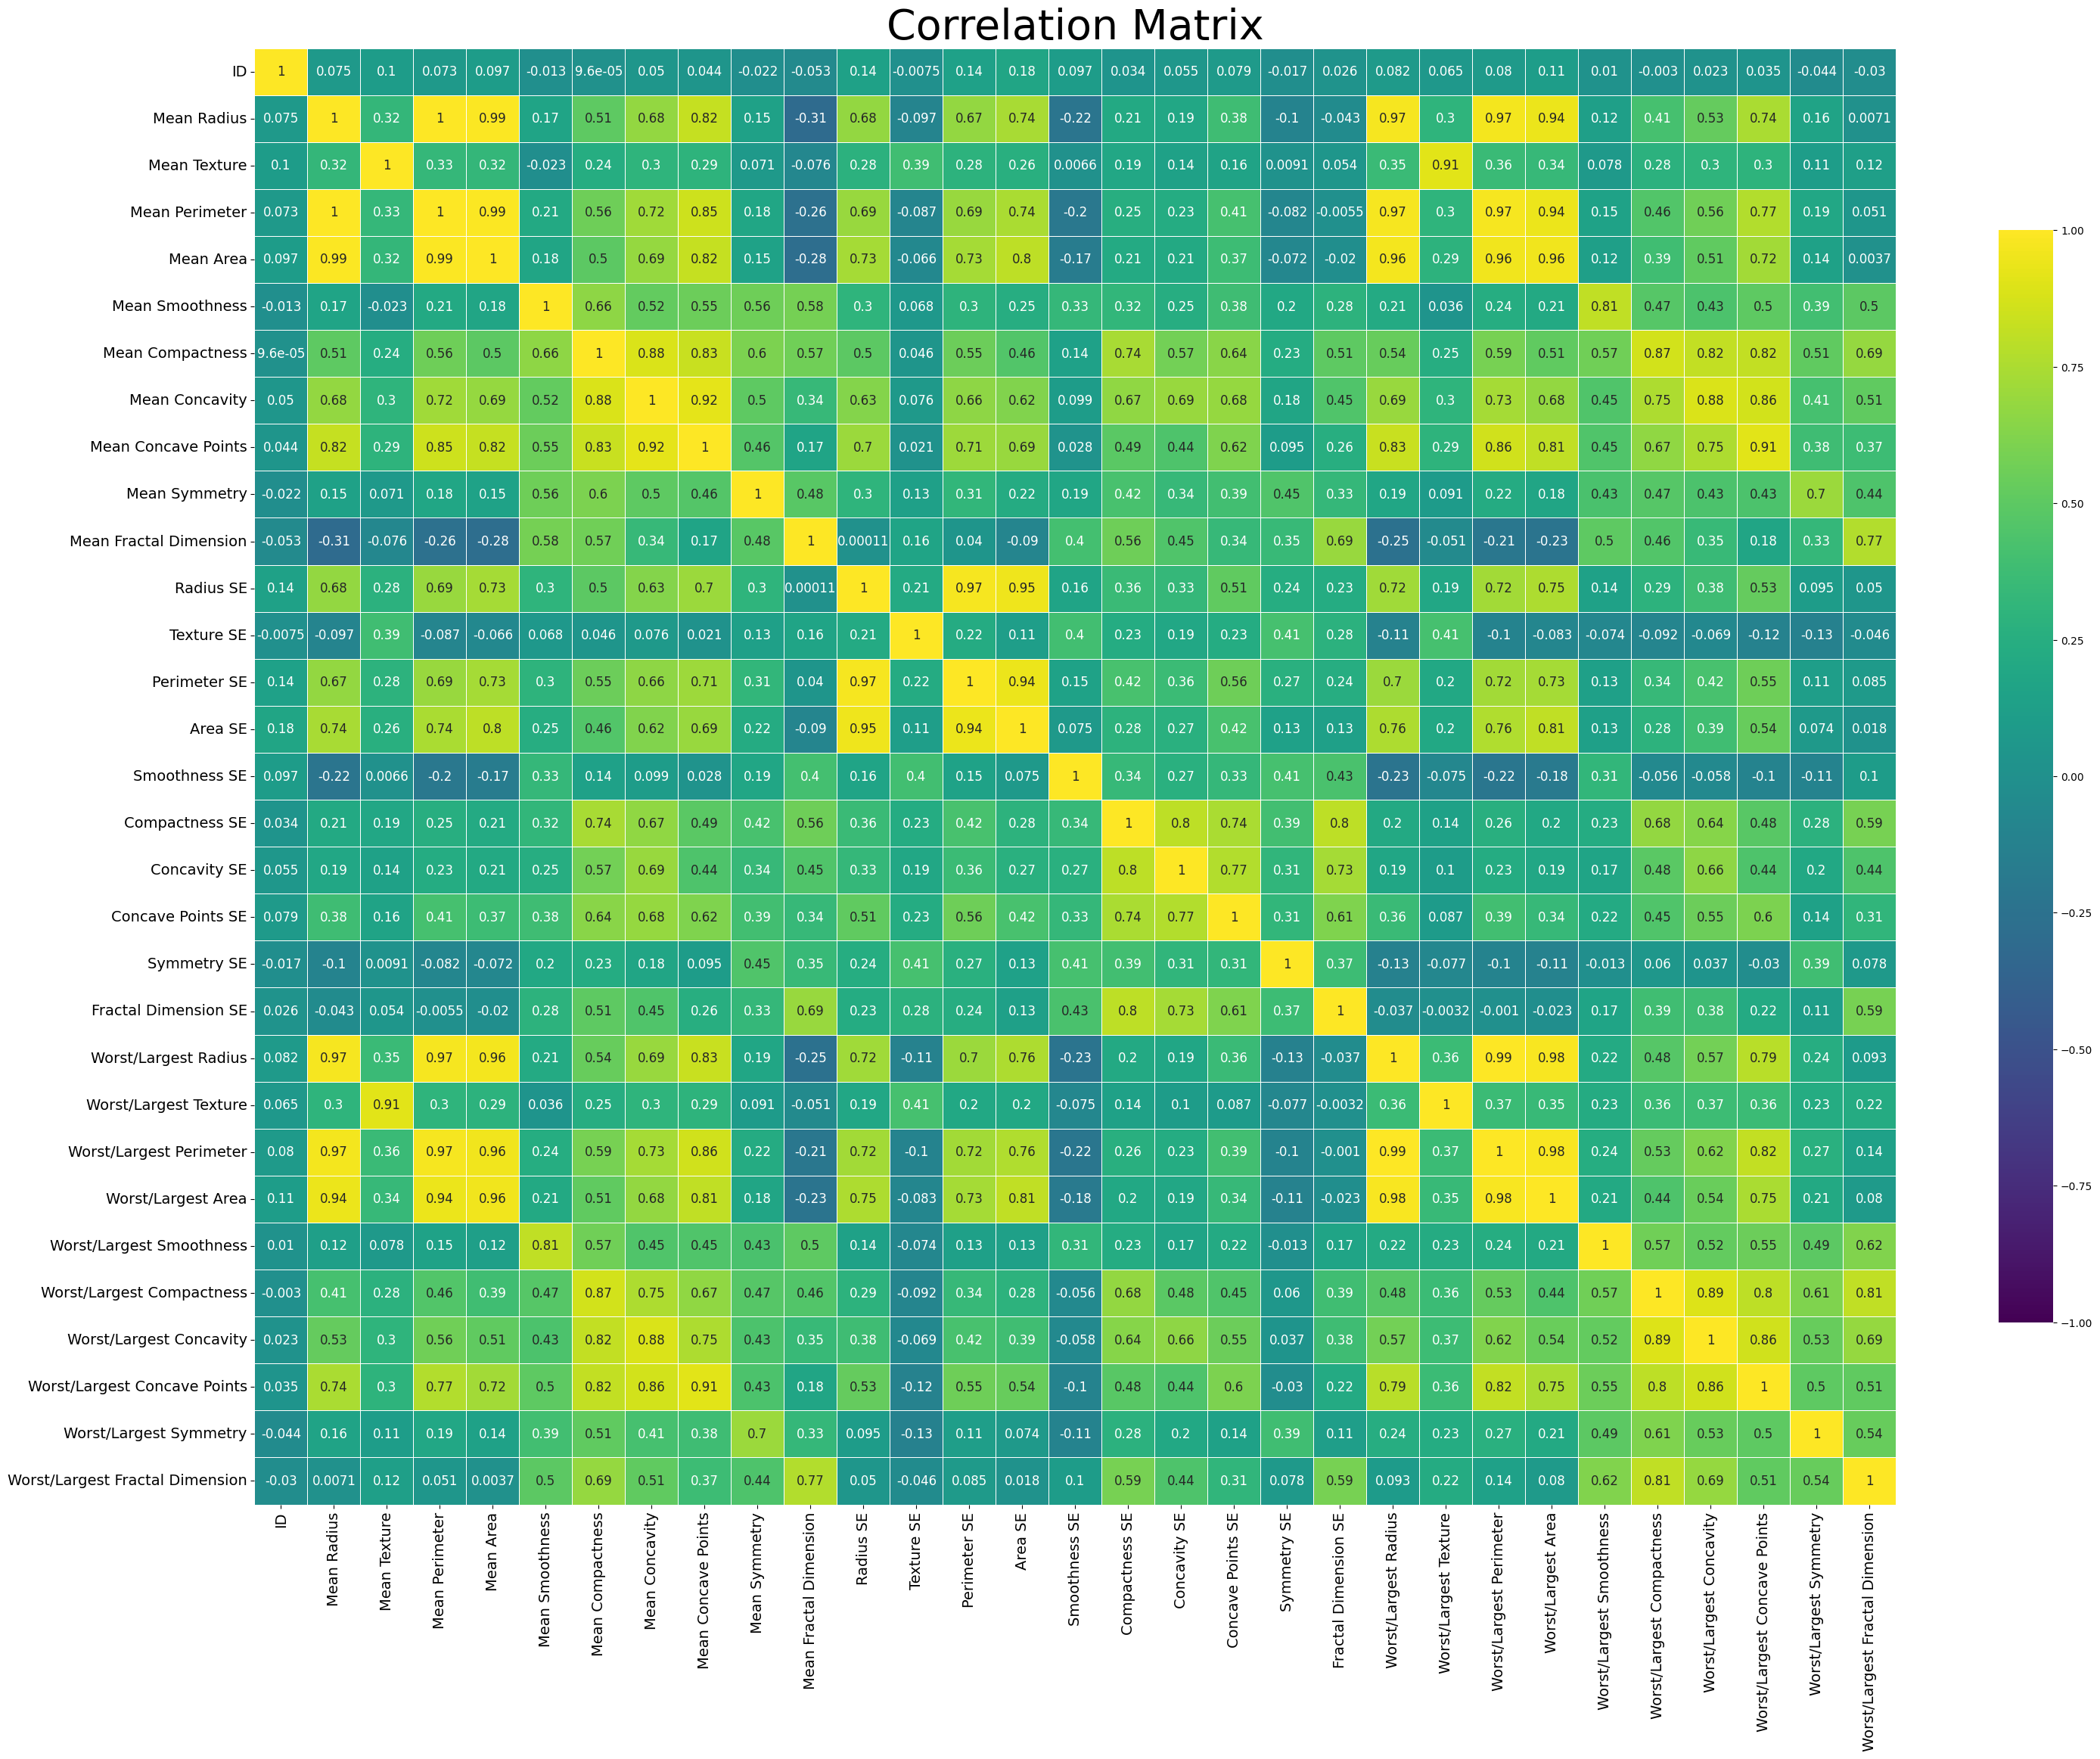

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .75},annot_kws={"size": 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix',fontsize=40)
plt.show()

In [ ]:
# Part B : Predictive Modelling

In [ ]:
# Encoding the Diagnosis class
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst/Largest Radius,Worst/Largest Texture,Worst/Largest Perimeter,Worst/Largest Area,Worst/Largest Smoothness,Worst/Largest Compactness,Worst/Largest Concavity,Worst/Largest Concave Points,Worst/Largest Symmetry,Worst/Largest Fractal Dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.iloc[:,2:]
y = data.iloc[:,1:2]

feature_names = np.array(['Benign','Malignant'])

In [ ]:
def breast_cancer_predictive_analysis(X, y, k=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    logreg = LogisticRegression(max_iter=2000)
    logreg.fit(X_train, y_train)
    y_pred_logreg = logreg.predict(X_test)

    cm_knn = classification_report(y_test, y_pred_knn, target_names = feature_names )
    cm_logreg = classification_report(y_test, y_pred_logreg, target_names = feature_names)

    return cm_knn , cm_logreg

In [ ]:
cm_knn, cm_logreg = breast_cancer_predictive_analysis(X, y)
print("Classofication report  for k-NN:\n")
print(cm_knn)
print("\nClassification Report for Logistic Regression:\n")
print(cm_logreg)

Classofication report  for k-NN:

              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       108
   Malignant       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       108
   Malignant       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Train size: 398, Test: 171


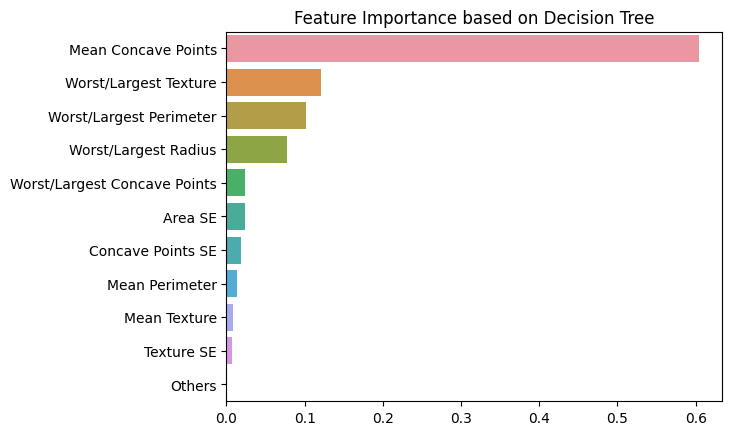

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state=42)
print(f"Train size: {len(X_train)}, Test: {len(X_test)}")
def get_feature_importance(x_train, y_train):
    decision = DecisionTreeClassifier(criterion='entropy', random_state=42)
    decision.fit(x_train, y_train)

    # put importance and X columns in a dictionary
    importance = list(decision.feature_importances_)
    X_cols = list(x_train.columns)
    importance = dict(zip(X_cols,importance))
    # remove columns with no importance and sort in descending order
    importance = {v:k for (k,v) in importance.items() if v > 0.0}
    importance = {importance.get(k):k for k in sorted(importance,reverse=True)}
    return importance
imp = get_feature_importance(X_train, y_train)
imp['Others']=0
sns.barplot(y=list(imp.keys()), x = list(imp.values()))
plt.title("Feature Importance based on Decision Tree")
plt.show()

In [ ]:
def get_best_knn_model(x_train, y_train, x_test, y_test):
    """
    Method returns a df of different knn models
      fitted with different parameters and their
      different scores for accuracy, error,
      precision, recall, f1 and features_used
    """
    # Specify the params for knn
    params = {'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                           }
    results = []
    features_list = get_feature_importance(x_train, y_train)
    features_list = list(features_list.keys())
    for weight in params['weights']:
        for algorithm in params['algorithm']:
            for i in range(len(features_list)):
                features_to_use = features_list[:i+1]
                x_train_copy = x_train[features_to_use]
                x_test_copy = x_test[features_to_use]
                scale = MinMaxScaler().fit(x_train_copy)
                x_train_copy = scale.transform(x_train_copy)
                x_test_copy = scale.transform(x_test_copy)
                knn = KNeighborsClassifier(n_neighbors=3,weights=weight, algorithm=algorithm).fit(x_train_copy,y_train)
                pred = knn.predict(x_test_copy)
                accuracy = metrics.accuracy_score(y_test, pred)
                precision = metrics.precision_score(y_test, pred,average='weighted')
                recall = metrics.recall_score(y_test, pred, average='weighted')
                f1 = metrics.f1_score(y_test, pred, average='weighted')
                classification_error = round(1 - accuracy, 2)

                accuracy = round(accuracy*100, 3)
                precision = round(precision*100, 3)
                recall = round(recall*100, 3)
                f1 = round(f1*100, 3)

                model_desc = f"Weights: {weight}, Algorithm: {algorithm}"
                results.append({"Model Description": model_desc,
                                "Accuracy": accuracy,
                                "Error": classification_error,
                                "Precision": precision,
                                "Recall": recall,
                                "F1_Score": f1,
                                "Features_used":i+1})
    print(len(results))
    results_df = pd.DataFrame(results)
    # sorting by Accuracy column
    results_df = results_df.sort_values(by='Accuracy', ascending=False)
    # Removing rows with duplicate 'Accuracy' and reseting index
    results_df = results_df.drop_duplicates(subset=['Accuracy']).reset_index(drop=True)
    return results_df


knn_clf = get_best_knn_model(X_train, y_train, X_test, y_test)
knn_clf

80


,Model Description,Accuracy,Error,Precision,Recall,F1_Score,Features_used
0,"Weights: uniform, Algorithm: brute",98.246,0.02,98.293,98.246,98.236,4
1,"Weights: uniform, Algorithm: kd_tree",97.661,0.02,97.674,97.661,97.653,6
2,"Weights: distance, Algorithm: ball_tree",97.076,0.03,97.073,97.076,97.071,7
3,"Weights: distance, Algorithm: kd_tree",96.491,0.04,96.491,96.491,96.491,10
4,"Weights: uniform, Algorithm: brute",93.567,0.06,93.595,93.567,93.578,2
5,"Weights: distance, Algorithm: ball_tree",91.228,0.09,91.367,91.228,91.268,2
6,"Weights: uniform, Algorithm: auto",90.058,0.10,90.207,90.058,90.104,1
7,"Weights: distance, Algorithm: brute",88.304,0.12,88.304,88.304,88.304,1


In [ ]:
def prediction_statistics(y_actual, y_predicted):
    """
    Method outputs
      - classification_report
      - accuracy & error scores
      - confusion matrix
    """
    print(metrics.classification_report(y_actual, y_predicted, target_names=feature_names))
    accuracy = metrics.accuracy_score(y_actual, y_predicted) * 100
    error = 100-accuracy
    print(f"Accuracy: {round(accuracy,3)}%")
    print(f"Error: {round(error,3)}%\n")
    cm=metrics.confusion_matrix(y_actual, y_predicted)
    classes = list(set(y_predicted))

    classes = ['Benign' if i=='B' or i == 0 else 'Malignant' for i in classes]
    print(f"***** Confusion Matrix *****\n{cm}")
    sns.set(font_scale=0.8)
    fig, ax = plt.subplots(figsize=(2,2))
    ax = sns.heatmap(cm,
                cmap=sns.diverging_palette(20, 220, n=200),
                annot=True,
                fmt='g')
    ax.set_yticklabels(classes, rotation=90)
    ax.set_xticklabels(classes)
    print()

              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99       108
   Malignant       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 98.246%
Error: 1.754%

***** Confusion Matrix *****
[[108   0]
 [  3  60]]



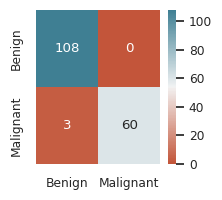

In [ ]:
# Implementing the best KNN model
features = get_feature_importance(X_train, y_train)
features = list(features.keys())[:4]
x_train_copy = X_train[features]
x_test_copy = X_test[features]
scale = MinMaxScaler().fit(x_train_copy)
x_train_copy = scale.transform(x_train_copy)
x_test_copy = scale.transform(x_test_copy)
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform', algorithm='brute').fit(x_train_copy,y_train)
pred = knn.predict(x_test_copy)
prediction_statistics(y_test, pred)


In [ ]:
def get_best_lr_model(x_train, y_train, x_test, y_test):
    # Specify the params for knn
    params = {'fit_intercept':[True, False],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'multi_class':['auto', 'ovr'],
              'max_iter':list(range(100,3100,400))}
    results = []
    features_list = get_feature_importance(x_train, y_train)
    features_list = list(features_list.keys())
    for fit_intercept in params['fit_intercept']:
        for solver in params['solver']:
            for multi_class in params['multi_class']:
                for iter in params['max_iter']:
                    for i in range(len(features_list)):
                        features_to_use = features_list[:i+1]
                        x_train_copy = x_train[features_to_use]
                        x_test_copy = x_test[features_to_use]
                        lr = LogisticRegression( multi_class=multi_class, max_iter=iter,
                                                fit_intercept=fit_intercept, solver= solver, n_jobs=5).fit(x_train_copy,y_train)
                        pred = lr.predict(x_test_copy)
                        accuracy = metrics.accuracy_score(y_test, pred)
                        precision = metrics.precision_score(y_test, pred,average='weighted')
                        recall = metrics.recall_score(y_test, pred, average='weighted')
                        f1 = metrics.f1_score(y_test, pred, average='weighted')
                        classification_error = round(1 - accuracy, 3)

                        accuracy = round(accuracy*100, 3)
                        precision = round(precision*100, 3)
                        recall = round(recall*100, 3)
                        f1 = round(f1*100, 3)

                        model_desc = f""" multi_class={multi_class}, max_iter={iter}, fit_intercept={fit_intercept}, solver= {solver}"""
                        results.append({"Model Description": model_desc,
                                        "Accuracy": accuracy,
                                        "Error": classification_error,
                                        "Precision": precision,
                                        "Recall": recall,
                                        "F1_Score": f1,
                                        "Features used": i+1})
    print(len(results))
    results_df = pd.DataFrame(results)
    # sorting by Accuracy column
    results_df = results_df.sort_values(by='Accuracy', ascending=False)
    # Removing rows with duplicate 'Accuracy' and reseting index
    results_df = results_df.drop_duplicates(subset=['Accuracy']).reset_index(drop=True)
    return results_df


logr_clf = get_best_lr_model(X_train, y_train, X_test, y_test)
logr_clf.head()

1920


,Model Description,Accuracy,Error,Precision,Recall,F1_Score,Features used
0,"multi_class=auto, max_iter=2900, fit_intercep...",97.076,0.029,97.073,97.076,97.071,4
1,"multi_class=ovr, max_iter=2900, fit_intercept...",96.491,0.035,96.495,96.491,96.479,9
2,"multi_class=ovr, max_iter=500, fit_intercept=...",95.906,0.041,95.900,95.906,95.899,8
3,"multi_class=auto, max_iter=2900, fit_intercep...",95.322,0.047,95.368,95.322,95.287,10
4,"multi_class=ovr, max_iter=2500, fit_intercept...",94.737,0.053,94.949,94.737,94.665,4


In [ ]:
# print best logistic model description
print(logr_clf['Model Description'][0])

 multi_class=auto, max_iter=2900, fit_intercept=True, solver= newton-cholesky


              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98       108
   Malignant       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 97.076%
Error: 2.924%

***** Confusion Matrix *****
[[106   2]
 [  3  60]]



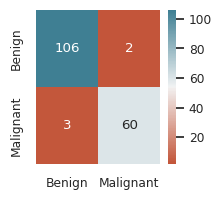

In [ ]:
# Implementing the best Logistic regression model
features = get_feature_importance(X_train, y_train)
features = list(features.keys())[:4]
x_train_copy = X_train[features]
x_test_copy = X_test[features]
log_reg = LogisticRegression(multi_class='auto', max_iter=2900,
                              fit_intercept=True, solver= 'newton-cholesky', n_jobs=5).fit(x_train_copy,y_train)
pred = log_reg.predict(x_test_copy)
prediction_statistics(y_test, pred)